# Relation Between YouTube Video Title and Views

This notebook is to find the relation between the title of YouTube Videos and the views.  

Collaborators: Chih-Wei Huang, Cong Shen.  

Date: 10/29/2021

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Import US and UK Youtube Video Data

In [2]:
#import US data from the CSV
us_yt = pd.read_csv('data/USvideos.csv')
gb_yt = pd.read_csv('data/GBvideos.csv')
display(us_yt.info)
display(us_yt.head())
display(gb_yt.info)
display(gb_yt.head())

<bound method DataFrame.info of           video_id trending_date  \
0      2kyS6SvSYSE      17.14.11   
1      1ZAPwfrtAFY      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      puqaWrEC7tY      17.14.11   
4      d380meD0W0M      17.14.11   
...            ...           ...   
40944  BZt0qjTWNhw      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualis

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


<bound method DataFrame.info of           video_id trending_date  \
0      Jw1Y-zhQURU      17.14.11   
1      3s1rvMFUweQ      17.14.11   
2      n1WpP7iowLc      17.14.11   
3      PUTEiSjKwJU      17.14.11   
4      rHwDegptbI4      17.14.11   
...            ...           ...   
38911  l884wKofd54      18.14.06   
38912  IP8k2xkhOdI      18.14.06   
38913  Il-an3K9pjg      18.14.06   
38914  -DRsfNObKIQ      18.14.06   
38915  4YFo4bdMO8Q      18.14.06   

                                                   title  \
0          John Lewis Christmas Ad 2017 - #MozTheMonster   
1              Taylor Swift: …Ready for It? (Live) - SNL   
2             Eminem - Walk On Water (Audio) ft. Beyoncé   
3      Goals from Salford City vs Class of 92 and Fri...   
4      Dashcam captures truck's near miss with child ...   
...                                                  ...   
38911  Enrique Iglesias - MOVE TO MIAMI (Official Vid...   
38912  Jacob Sartorius - Up With It (Official Music V..

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [3]:
# drop unnecessary columns
us_yt.drop(['video_id','trending_date','category_id','thumbnail_link','video_error_or_removed','comments_disabled','ratings_disabled', 'description'],axis=1,inplace=True)
gb_yt.drop(['video_id','trending_date','category_id','thumbnail_link','video_error_or_removed','comments_disabled','ratings_disabled', 'description'],axis=1,inplace=True)
#sort by top views
us_yt.sort_values(["views"], axis=0,ascending=[False], inplace=True)
gb_yt.sort_values(["views"], axis=0,ascending=[False], inplace=True)

In [4]:
#eliminate duplicate rows and keep the one with highest views(the latest)
us_yt = us_yt.drop_duplicates(subset='title', keep='first')
gb_yt = gb_yt.drop_duplicates(subset='title', keep='first')
display(us_yt.head())
display(us_yt.info)
display(gb_yt.head())
display(gb_yt.info)

,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count
38547,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232
6181,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698
34708,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039
34888,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,2018-04-20T10:40:51.000Z,"Becky G|""Natti Natasha""|""Natti Natasha Music""|...",139334502,1425496,119798,83941
38273,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655


<bound method DataFrame.info of                                                    title        channel_title  \
38547  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
6181   YouTube Rewind: The Shape of 2017 | #YouTubeRe...    YouTube Spotlight   
34708               Ariana Grande - No Tears Left To Cry     ArianaGrandeVevo   
34888  Becky G, Natti Natasha - Sin Pijama (Official ...           BeckyGVEVO   
38273                BTS (방탄소년단) 'FAKE LOVE' Official MV              ibighit   
...                                                  ...                  ...   
160               Huffy Metaloid Bicycle Commercial 1997      90s Commercials   
12716     Raw: 3 South Carolina Deputies, 1 Officer Shot     Associated Press   
14984                                      Artwork Forge     Palo Alto Online   
777        Coach Taggart Monday Presser Ahead of Arizona        GoDucksdotcom   
14782   1 dead, others injured after Ky. school shooting                Newsy

,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count
28412,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",424538912,2818771,149275,99380
34460,"Te Bote Remix - Casper, Nio García, Darell, Ni...",Flow La Movie,2018-04-11T22:00:00.000Z,"Te Bote|""Te Bote Remix""|""Flow La Movie""|""Ozuna...",337621571,2581961,166549,113564
25545,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,2018-02-15T00:00:03.000Z,"Bad|""Bunny""|""Bad Bunny""|""Video Oficial""|""Music...",328860380,3823879,215530,225216
21162,Ozuna x Romeo Santos - El Farsante Remix,Ozuna,2018-01-30T15:00:05.000Z,"Ozuna|""Reggaeton""|""Odisea""|""Odisea The Album""|...",288811992,1618180,151147,67506
38401,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",259721696,5444541,379862,553371


<bound method DataFrame.info of                                                    title  \
28412  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...   
34460  Te Bote Remix - Casper, Nio García, Darell, Ni...   
25545               Bad Bunny - Amorfoda | Video Oficial   
21162           Ozuna x Romeo Santos - El Farsante Remix   
38401  Childish Gambino - This Is America (Official V...   
...                                                  ...   
7985   Scarlets VS Benetton. Highlights GAME Champion...   
788                 New album Open Here out 2nd February   
1783   George Durack | Remembrance Sunday | You Can't...   
5781         QUIZ : Name the Trail : A Christmas Cracker   
4770   Mountain Bikers Worried About Military Land Be...   

                        channel_title              publish_time  \
28412                      NickyJamTV  2018-03-02T05:00:19.000Z   
34460                   Flow La Movie  2018-04-11T22:00:00.000Z   
25545                       Bad Bunny  2018-02

In [5]:
#Word count in each title:
us_yt['count_title'] = us_yt["title"].apply(lambda x: len(str(x).split()))
gb_yt['count_title'] = gb_yt["title"].apply(lambda x: len(str(x).split()))

[None, None]

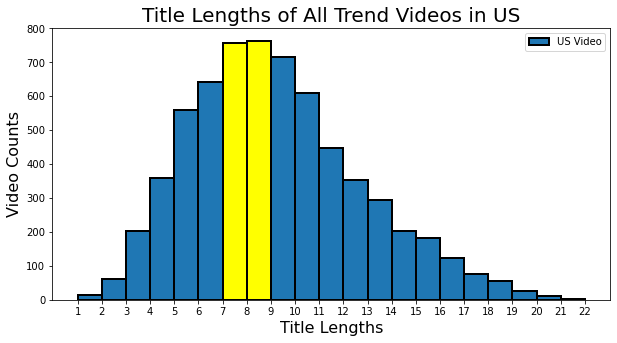

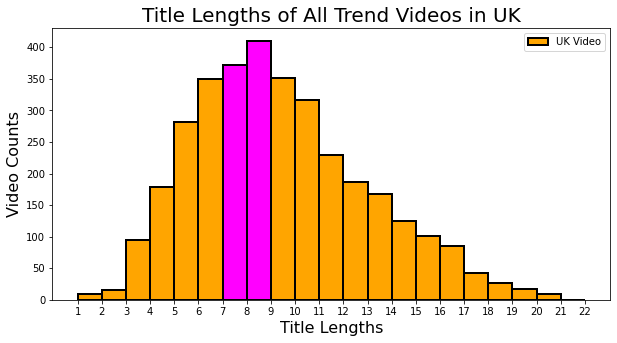

In [6]:
#visualization
plt.figure(figsize=(10,5))
bins_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
n, bins, patches = plt.hist(us_yt['count_title'], bins=bins_list, edgecolor = 'black', label = 'US Video', lw=2)
plt.title('Title Lengths of All Trend Videos in US',fontsize=20)
plt.legend()
plt.xticks(bins_list)
plt.xlabel('Title Lengths',fontsize=16)
plt.ylabel('Video Counts',fontsize=16)
plt.setp(patches[6:8], facecolor='yellow') 

plt.figure(figsize=(10,5))
bins_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
n, bins, patches = plt.hist(gb_yt['count_title'], bins=bins_list,color = 'orange', edgecolor = 'black',label = 'UK Video', lw=2)
plt.title('Title Lengths of All Trend Videos in UK',fontsize=20)
plt.legend()
plt.xticks(bins_list)
plt.xlabel('Title Lengths',fontsize=16)
plt.ylabel('Video Counts',fontsize=16)
plt.setp(patches[6:8], facecolor='magenta') 


In [7]:
#upper case words count in each title:
us_yt["count_upper"] = us_yt["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
gb_yt["count_upper"] = gb_yt["title"].apply(lambda x: len([m for m in str(x).split() if m.isupper()]))

In [8]:
#lambda function testing
test = lambda x: len([w for w in str(x).split() if w.isupper()])
print(test('UC Berkeley OFFICIAL YouTube VIDEO'))

3


Text(0, 0.5, 'Video Counts')

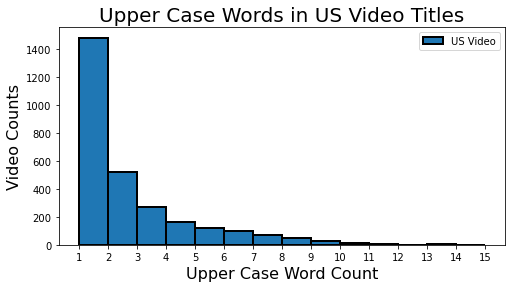

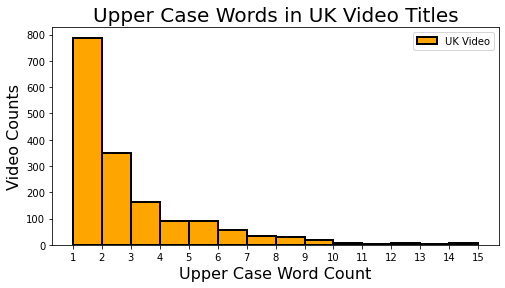

In [9]:
plt.figure(figsize=(8,4))
bins_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
n, bins, patches = plt.hist(us_yt['count_upper'], bins=bins_list, edgecolor = 'black',label = 'US Video', lw=2)
plt.title('Upper Case Words in US Video Titles',fontsize=20)
plt.legend()
plt.xticks(bins_list)
plt.xlabel('Upper Case Word Count',fontsize=16)
plt.ylabel('Video Counts',fontsize=16)

plt.figure(figsize=(8,4))
bins_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
n, bins, patches = plt.hist(gb_yt['count_upper'], bins=bins_list,color = 'orange', edgecolor = 'black',label = 'UK Video', lw=2)
plt.title('Upper Case Words in UK Video Titles',fontsize=20)
plt.legend()
plt.xticks(bins_list)
plt.xlabel('Upper Case Word Count',fontsize=16)
plt.ylabel('Video Counts',fontsize=16)

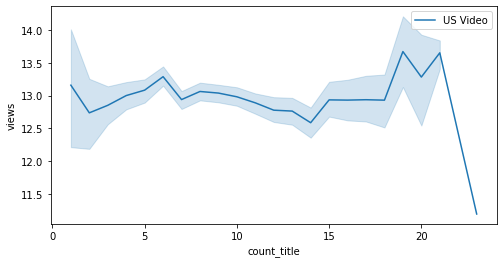

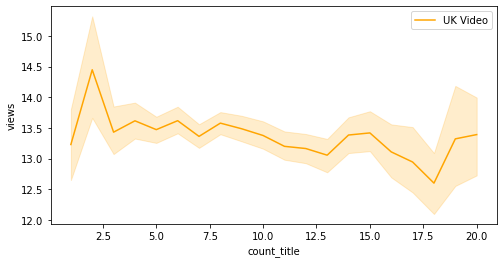

In [10]:
plt.figure(figsize=(8,4))
sns.lineplot(x= us_yt['count_title'], y=np.log(us_yt['views']), label = 'US Video');
plt.figure(figsize=(8,4))
sns.lineplot(x= gb_yt['count_title'], y=np.log(gb_yt['views']), color = 'orange', label = 'UK Video');

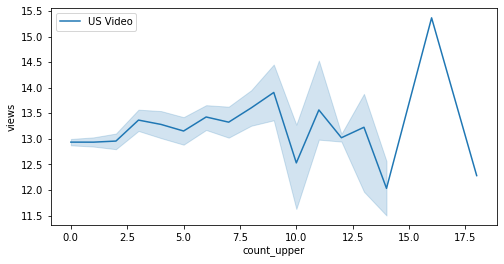

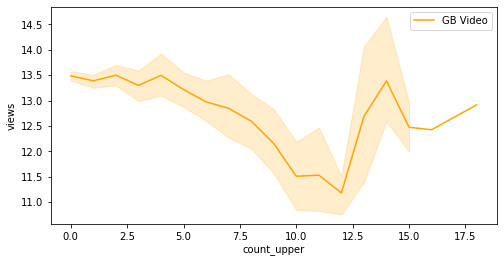

In [11]:
plt.figure(figsize=(8,4))
sns.lineplot(x= us_yt['count_upper'], y=np.log(us_yt['views']), label = 'US Video');
plt.figure(figsize=(8,4))
sns.lineplot(x= gb_yt['count_upper'], y=np.log(gb_yt['views']), color = 'orange', label = 'GB Video');

FEED BACK(10/22/2021):  
1. Define the clickbatness! It should be 100% Upper case words in the title.  
2. compute the correlation coefficient between the clickbaits and views, do linear regression, scatetr plot

### Clickbait Analysis 10/29/2021

Create a 'clickbait' column, '1' if the difference between the total word count and total upper case word is less than 2.  
Based on the trial, there's only 211 results if the 'True' statement is set all words are upper case.  
To allow more samples for analysis, the standard is set as shown below.

In [12]:
us_yt["clickbait"] = us_yt.apply(lambda row: int(1) if row['count_title']-row['count_upper']<=2 else int(0), axis=1)

saved_col = us_yt["clickbait"]

us_yt.sort_values(["clickbait"], axis=0,ascending=[False], inplace=True)
display(us_yt.head())

,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,count_title,count_upper,clickbait
6592,WHAT'S THE BEST HOLIDAY GIFT?/ GABY & ALLISON,Just Between Us,2017-12-11T16:00:08.000Z,"women in comedy|""comedy""|""funny""|""humor""|""funn...",66190,4070,76,360,8,7,1
20160,MY FACE CHART RECREATION! | MILK1422,LustreLux,2018-02-16T00:00:00.000Z,"@katy|""lustrelux""|""tutorial""|""facechart""|""face...",215237,11154,334,1072,6,5,1
40883,HOW WELL DOES MY MOM KNOW ME?,Markiplier,2018-05-29T18:41:24.000Z,"markiplier|""how well does my mom know me""|""how...",1575302,122145,690,20481,7,7,1
16389,THE CLOVERFIELD PARADOX | WATCH NOW | NETFLIX,Netflix,2018-02-05T00:22:19.000Z,"Netflix|""Trailer""|""Netflix Original Series""|""N...",1575608,15910,634,3032,8,6,1
9163,SURPRISE!!! I HAVE MY OWN PERFUME!,Miranda Sings,2017-12-20T20:09:36.000Z,"miranda|""sings""|""mirandasings08""|""beautiful""|""...",586875,27803,1776,3882,6,6,1


In [13]:
#us_yt.drop(['clickbait'],axis=1,inplace=True)

In [14]:
count = 0
for row in saved_col:
    if row == 1:
        count += 1
ratio = "{:.3f}".format(count/len(saved_col))

print('Total videos:', len(saved_col))
print('Videos with clickbaits:', count)
print('Clickbaits ratio:', ratio)

Total videos: 6455
Videos with clickbaits: 499
Clickbaits ratio: 0.077


In [15]:
us_yt.corr()

,views,likes,dislikes,comment_count,count_title,count_upper,clickbait
views,1.000000,0.834386,0.441927,0.573957,-0.037113,-0.007054,0.000757
likes,0.834386,1.000000,0.420739,0.765372,-0.075260,0.029594,0.048025
dislikes,0.441927,0.420739,1.000000,0.734968,-0.033598,-0.004684,0.034128
comment_count,0.573957,0.765372,0.734968,1.000000,-0.070748,0.046512,0.086444
count_title,-0.037113,-0.075260,-0.033598,-0.070748,1.000000,0.111379,-0.263960
count_upper,-0.007054,0.029594,-0.004684,0.046512,0.111379,1.000000,0.580260
clickbait,0.000757,0.048025,0.034128,0.086444,-0.263960,0.580260,1.000000


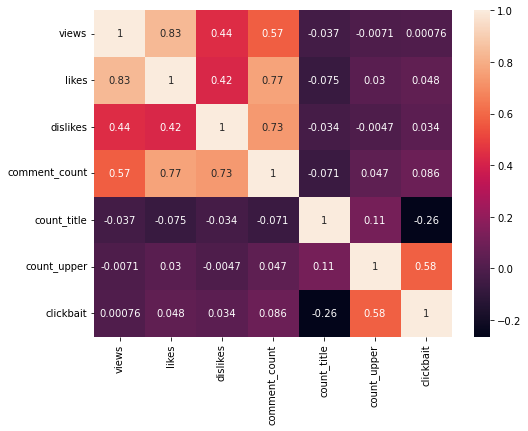

In [16]:
# Visualize the correlations, see the plots below
plt.figure(figsize=(8,6))
sns.heatmap(us_yt.corr(), annot=True);

As shown in the correlation matrix and the plot, the clickbait isn't necessary for higher views.

D:\anaconda3\envs\p4e\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


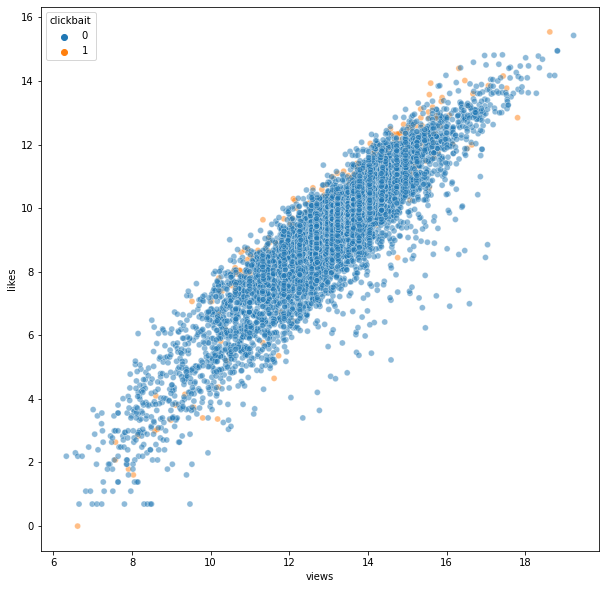

In [17]:
#scatterplot for likes/views
plt.figure(figsize=(10,10))
order = [0,1]
#sns.scatterplot(x=np.log(us_yt['views']), y=us_yt['count_title'], hue=us_yt['clickbait'], hue_order = order);
sns.scatterplot(x=np.log(us_yt['views']), y=np.log(us_yt['likes']), hue=us_yt['clickbait'], hue_order = order, alpha = 0.5);

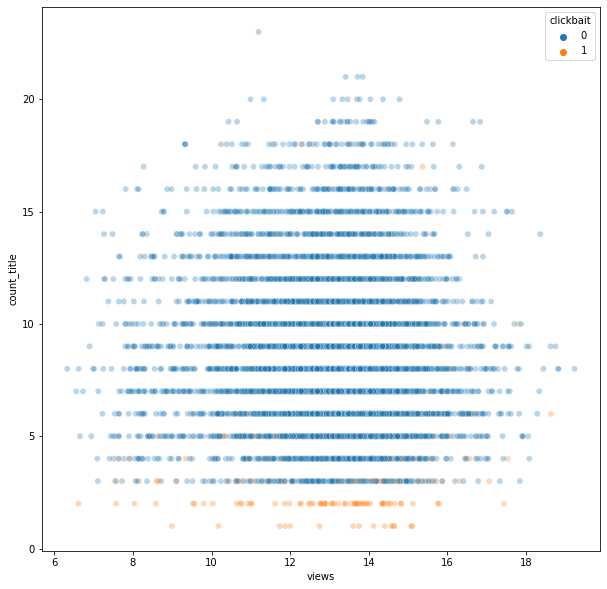

In [18]:
#scatterplot for title length / views
plt.figure(figsize=(10,10))
order = [0,1]
sns.scatterplot(x=np.log(us_yt['views']), y=us_yt['count_title'], hue=us_yt['clickbait'], hue_order = order, alpha = 0.3);

### Linear Regression

In [19]:
import sklearn.model_selection as model_selection

X = us_yt.loc[:,['count_title','clickbait']].values
y = us_yt.loc[:,'views'].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

In [20]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = regr.predict(X_test)

from sklearn import metrics

print('Mean squared error: %.2f' % metrics.mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % metrics.r2_score(y_test, y_pred))

Mean squared error: 55938421176066.93
Coefficient of determination: 0.00


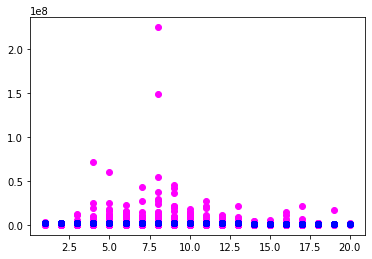

In [22]:
plt.scatter(X_test[:,0], y_test, color='magenta')
plt.scatter(X_test[:,0], y_pred, color='blue')

The linear regression performs poorly might due to the fact that most of the clickbait video titles are less than 5 words which lower the accuracy.